In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

import warnings
warnings.filterwarnings('ignore')

In [2]:
fs_dictionary = pd.read_csv('path to stemmed dictionary').drop(['Unnamed: 0'], axis=1).dropna()

In [3]:
fs_dictionary

,Word,Sentiment
0,abl,1.0
1,abnorm,-1.0
2,abrupt,-1.0
3,absorb,1.0
4,abund,-1.0
...,...,...
238,withstand,1.0
239,worri,-1.0
240,worrisom,-1.0
241,worsen,-1.0


In [4]:
f = open('path to list of years', "r")
article_names = [fname.strip() for fname in f.readlines()] 

all_counts = pd.DataFrame()
for yname in article_names:
    fs_word_counts = {}
    with open(f"path to fs_words output files") as f:
        word_list = f.readlines()

        # add to dictionary
        for word in word_list:
            key = word.split(',')[0]
            count = int(word.split(',')[1].strip())
            if key not in fs_word_counts:
                fs_word_counts[key] = count
            else:
                fs_word_counts[key] += count

        # store in data frame
        df = pd.DataFrame(list(fs_word_counts.items()))

        df = df.rename(columns= {0: "Word", 1: 'Count'})

        df['Year'] = yname
        
        # add to master df
        all_counts = pd.concat([all_counts, df])

In [5]:
all_counts = all_counts.sort_values(by=['Word', 'Year'])

In [6]:
all_counts

,Word,Count,Year
92,abl,646,1996
63,abl,820,1997
85,abl,1236,1998
149,abl,1311,1999
15,abl,1504,2000
...,...,...,...
40,writedown,44,2019
35,writedown,88,2020
49,writedown,2,2021
86,writedown,25,2022


In [43]:
def plot_counts(word):

    word_df = all_counts[all_counts['Word'] == word]

    y = word_df['Count']
    x = range(len(word_df['Year']))
    x_labs = [str(i) for i in word_df['Year'].to_list()]

    fig, ax = plt.subplots(figsize=(10,6))

    ax.plot(x, y, color='blue', label='Sentiment')

    ax.set_title(f"'{word}' match counts over time")
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')

    ax.set_xticks(np.arange(min(x), max(x)+1, 4))
    ax.set_xticklabels(x_labs[0:len(x_labs):4])
    

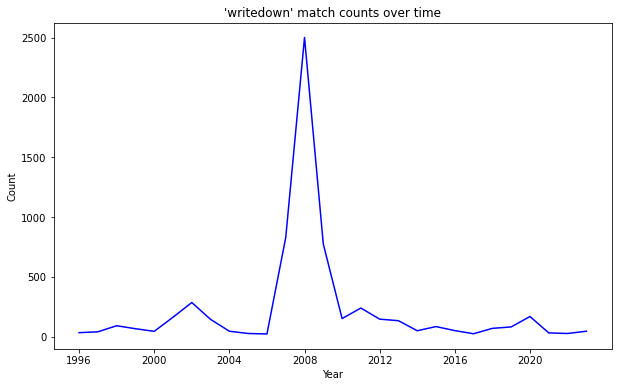

In [44]:
plot_counts('writedown')

In [ ]:
with PdfPages('path to output pdf') as pdf: 
    for i, word in enumerate(sorted(pd.unique(all_counts['Word']))):

        if i % 4 == 0:
            fig = plt.figure(figsize=(10,10))
        

        ax = fig.add_subplot(2, 2, i % 4 + 1)

        word_df = all_counts[all_counts['Word'] == word]

        y = word_df['Count']
        x = range(len(word_df['Year']))
        x_labs = [str(i) for i in word_df['Year'].to_list()]

        ax.plot(x, y, color='blue', label='Sentiment')

        ax.set_title(f"'{word}' match counts over time")
        ax.set_xlabel('Year')
        ax.set_ylabel('Count')

        ax.set_xticks(np.arange(min(x), max(x)+1, 4))
        ax.set_xticklabels(x_labs[0:len(x_labs):4])

        if i % 4 == 0:
            pdf.savefig(fig)


In [11]:
all_counts.to_csv("path to all_fs_counts", index=False)

In [13]:
# Calculate total count for each word
word_totals = all_counts.groupby('Word')['Count'].sum()
pd.DataFrame(word_totals).sort_values(by='Count', ascending=False).head(50).to_csv("path to top 50 words")

<Figure size 720x432 with 0 Axes>

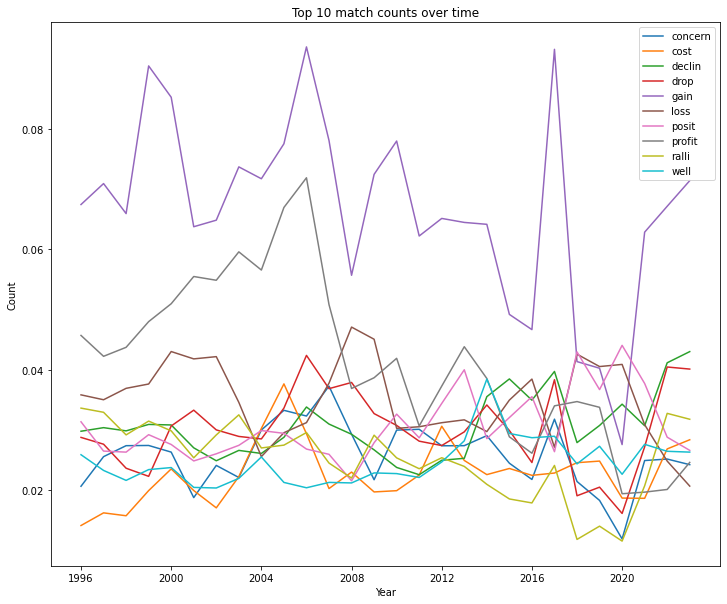

In [89]:
plt.figure(figsize=(10, 6))

fig, ax = plt.subplots(figsize=(12,10))

# Calculate total count for each word
word_totals = all_counts.groupby('Word')['Count'].sum()

n = 10
# Sort by total count and get the top words
top_words = word_totals.sort_values(ascending=False).index[:n]

df_top_words = all_counts[all_counts['Word'].isin(top_words)]

year_totals = all_counts.groupby("Year").sum().reset_index().rename(columns={"Count":"YearTotal"})
df_top_words = year_totals.merge(df_top_words, on="Year")

# Iterate over unique words and plot each line
for word in df_top_words['Word'].unique():
    subset = df_top_words[df_top_words['Word'] == word]
    ax.plot(subset['Year'], subset['Count']/subset['YearTotal'], label=word)

ax.set_title(f"Top {n} match counts over time")
ax.set_xlabel('Year')
ax.set_ylabel('Count')

ax.set_xticks(np.arange(min(x), max(x)+1, 4))
ax.set_xticklabels(x_labs[0:len(x_labs):4])

ax.legend()

<Figure size 720x432 with 0 Axes>

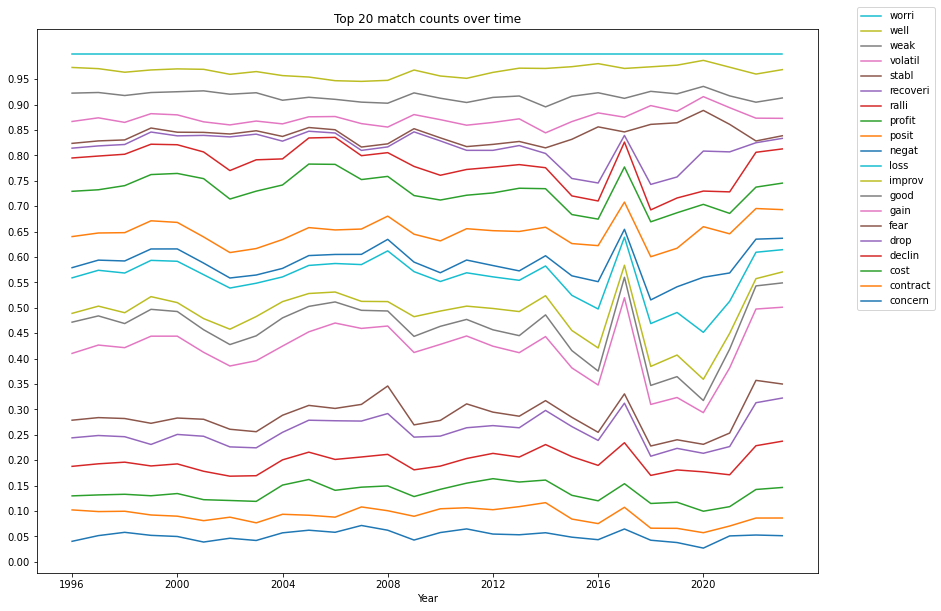

In [87]:
plt.figure(figsize=(10, 6))

fig, ax = plt.subplots(figsize=(14,10))

# Calculate total count for each word
word_totals = all_counts.groupby('Word')['Count'].sum()

n = 20
# Sort by total count and get the top words
top_words = word_totals.sort_values(ascending=False).index[:n]

df_top_words = all_counts[all_counts['Word'].isin(top_words)]

year_totals = df_top_words.groupby("Year").sum().reset_index().rename(columns={"Count":"YearTotal"})
df_top_words = year_totals.merge(df_top_words, on="Year")

sum_tracker = [0] * len(year_totals)

x = range(len(subset['Year']))
x_labs = subset['Year']
# Iterate over unique words and plot each line
for word in df_top_words['Word'].unique():
    subset = df_top_words[df_top_words['Word'] == word]

    running_sum = subset['Count']/subset['YearTotal'].to_list()
    running_sum = [el + sum_tracker[i] for i, el in enumerate(running_sum)]
    sum_tracker = running_sum
    ax.plot(subset['Year'], running_sum, label=word)

    ax.fill_between(x_values, y1_values, y2_values, color='gray', alpha=0.5, label='Shaded Area')

ax.set_title(f"Top {n} match counts over time")
ax.set_xlabel('Year')

ax.set_xticks(np.arange(min(x), max(x)+1, 4))
ax.set_xticklabels(x_labs[0:len(x_labs):4])

ax.set_yticks(np.arange(0, 1, 0.05))

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper center', bbox_to_anchor=(1.1, 1.05))

In [76]:
plt.figure(figsize=(10, 6))

fig, ax = plt.subplots(figsize=(12,10))

# Calculate total count for each word
word_totals = all_counts.groupby('Word')['Count'].sum()

n = 10
# Sort by total count and get the top words
top_words = word_totals.sort_values(ascending=False).index[:n]

df_top_words = all_counts[all_counts['Word'].isin(top_words)]

# Iterate over unique words and plot each line
for word in df_top_words['Word'].unique():
    subset = df_top_words[df_top_words['Word'] == word]
    ax.plot(subset['Year'], subset['Count'], label=word)
    ax.fill_between(x_values, y1_values, y2_values, color='gray', alpha=0.5, label='Shaded Area')

ax.set_title(f"Top {n} match counts over time")
ax.set_xlabel('Year')
ax.set_ylabel('Count')

ax.set_xticks(np.arange(min(x), max(x)+1, 4))
ax.set_xticklabels(x_labs[0:len(x_labs):4])

ax.legend()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [67]:
df_top_words

,Word,Count,Year
209,concern,3938,1996
190,concern,6766,1997
194,concern,9492,1998
176,concern,10833,1999
196,concern,11491,2000
...,...,...,...
152,worri,5740,2019
100,worri,3756,2020
168,worri,4310,2021
62,worri,4649,2022


,Year,Count_x,Word,Count_y
0,1996,97622,concern,3938
1,1996,97622,contract,6035
2,1996,97622,cost,2698
3,1996,97622,declin,5676
4,1996,97622,drop,5481
...,...,...,...,...
555,2023,112443,stabl,577
556,2023,112443,volatil,3862
557,2023,112443,weak,4508
558,2023,112443,well,6273
